In [2]:
feature_dict = {
    i:label for i, label in zip(
        range(4),
        ('sepal length in cm',
         'sepal width in cm',
         'petal length in cm',
         'petal width in cm',
        )
    )
}
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.io.parsers.read_csv(
    filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=','
)
df.columns = [l for i, l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True)

In [3]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# 把数据 做成 X和y
X = df.ix[:,0:4].values
y = df.ix[:,4].values

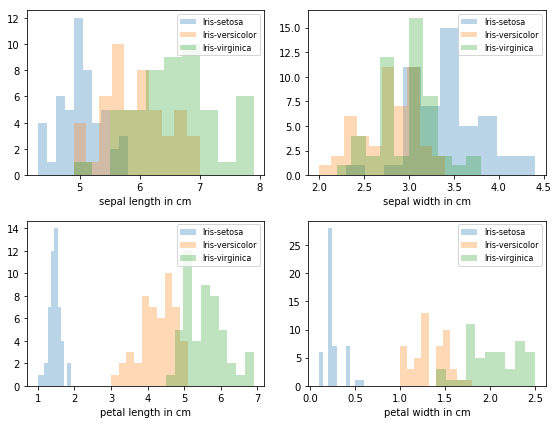

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

label_dict = {1:'Iris-Setosa',
              2:'Iris-Versicolor',
              3:'Iris-Virgnica'}
feature_dict = {
    0:'sepal length in cm',
    1:'sepal width in cm',
    2:'petal length in cm',
    3:'petal width in cm',
}

plt.figure(figsize=(8,6))
for cnt in range(4):
    plt.subplot(2,2, cnt+1)
    for lab in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
        plt.hist(X[y == lab, cnt],
                 label = lab,
                 bins = 10,
                 alpha = 0.3,)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

In [44]:
# 首先对数据进行标准化的处理
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [45]:
# 协方差矩阵的计算
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] -1)
print('Covariance matrix \n%s' % cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [46]:
# 使用numpy 进行协方差矩阵的计算
print('Numpy convariance matrix: \n%s' % np.cov(X_std.T))

Numpy convariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [47]:
# 对于协方差矩阵计算特征值和特征向量
con_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s'% (eig_vecs))
print('\nEigenvalues \n%s' % (eig_vals))

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [48]:
# 将特征值和特征向量一一对应起来
eig_paris = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print(eig_paris)
print('-----------------')

eig_paris.sort(key=lambda x:x[0], reverse=True)

print("Eigenvalues in descending order:")
for i in eig_paris:
    print(i[0])

[(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.92740362151734113, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163967, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.020746013995596183, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
-----------------
Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


In [49]:
tot = sum(eig_vals)
var_exp = [(i/ tot)* 100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.770452093801325, 23.030523267680625, 3.6838319576273828, 0.51519268089063819]


array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

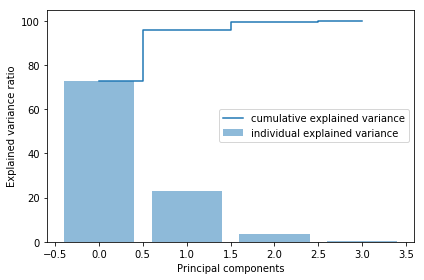

In [50]:
plt.figure(figsize=(6,4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [51]:
# 开始进行降维操作
matrix_w = np.hstack((eig_paris[0][1].reshape(4,1),
                      eig_paris[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [52]:
Y = X_std.dot(matrix_w)

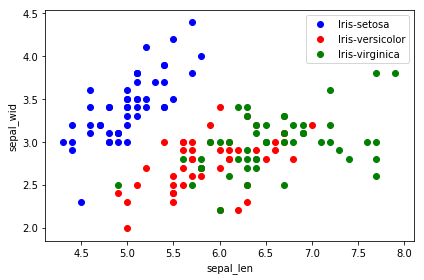

In [53]:
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa','Iris-versicolor','Iris-virginica'),
                   ('blue','red','green')):
    plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

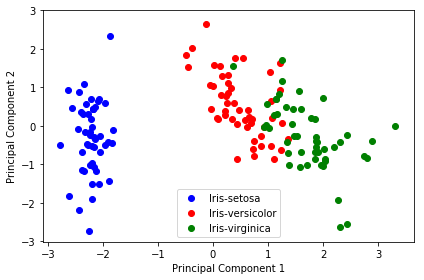

In [54]:
# 经过降维
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa','Iris-versicolor','Iris-virginica'),
                   ('blue','red','green')):
    plt.scatter(Y[y==lab,0],
                Y[y==lab,1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()